In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("./data/Mall_Customers.csv", index_col= 0)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [16]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [17]:
# Gender 컬럼을 get_dummies를 이용해서 숫자로 변환
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [18]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


In [19]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters =3)
model.fit(data)

KMeans(n_clusters=3)

In [20]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [21]:
result_df=data.copy()
result_df['label'] = model.labels_
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,1
197,45,126,28,0,2
198,32,126,74,1,1


In [22]:
# 40대의 나이에서 소득수준이 높은 사람이 낮은 사람보다 지출이 적음을 알수 있다.
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,32.692308,86.538462,82.128205,0.461538
2,40.394737,87.000000,18.631579,0.526316


In [23]:
result_df['label'].value_counts()

0    123
1     39
2     38
Name: label, dtype: int64

In [24]:
# 최적의 K 값을 찾기 위해 Elbow method
distance = []

for i in range(2,11):
    model = KMeans(n_clusters = i)
    model.fit(data)
    distance.append(model.inertia_)

<AxesSubplot:>

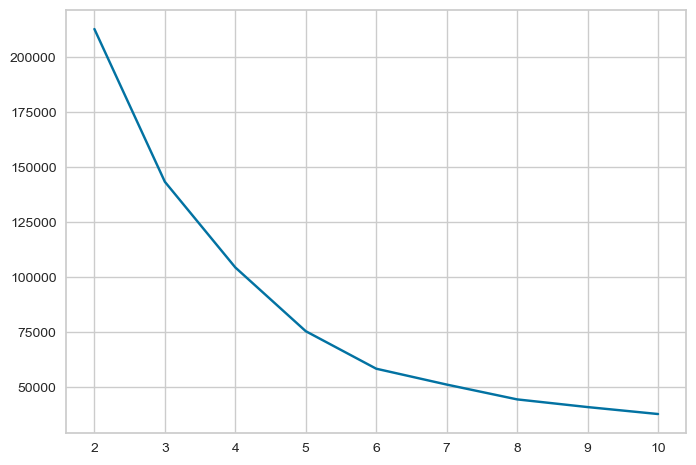

In [51]:
sns.lineplot(x=list(range(2,11)), y=distance)

In [35]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.5 MB/s eta 0:00:00


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

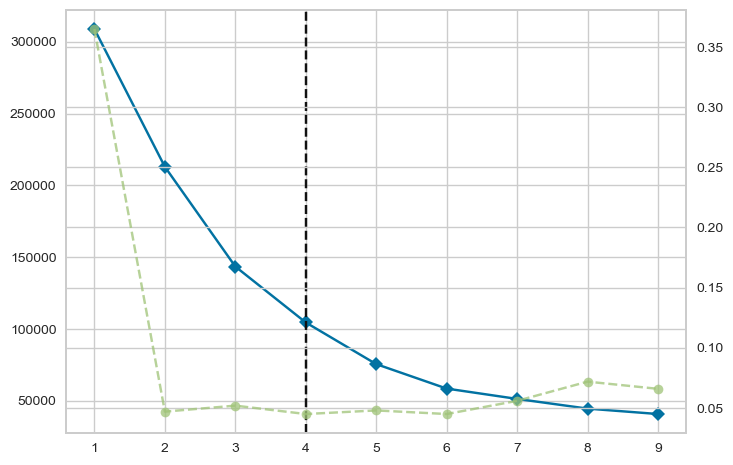

In [52]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data)

In [54]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(data)

KMeans(n_clusters=4)

In [55]:
model.labels_

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [56]:
data['label']= model.labels_
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,32.692308,86.538462,82.128205,0.461538
1,44.894737,48.705263,42.631579,0.378947
2,40.394737,87.000000,18.631579,0.526316
3,24.821429,28.714286,74.250000,0.500000


In [44]:
data.drop('label', axis=1, inplace=True)

In [45]:
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [58]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
pca.fit(data)

PCA(n_components=2)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

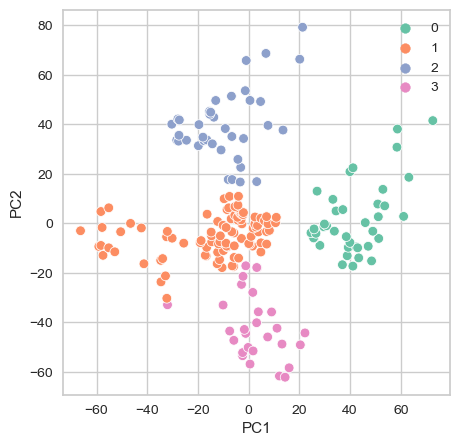

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.5            |           py39_0         299 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         299 KB

The following NEW packages will be INSTALLED:

  yellowbrick        districtdatalabs/win-64::yellowbrick-1.5-py39_0 None


Proceed ([y]/n)? 




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [60]:
pca_df = pca.transform(data)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
plt.figure(figsize=(5,5))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=model.labels_,palette='Set2')